In [1]:
import tifffile
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
visual_root=Path("../data/band_test/visual/")
analytic_root=Path("../data/band_test/analytic/")

In [3]:
analytic_band_value=[[],[],[]]
visual_band_value=[[],[],[]]
for visual_file in visual_root.glob("*Visual_clip.tif"):
    analytic_file=analytic_root/(visual_file.name.replace("Visual","AnalyticMS"))
    visual_image=tifffile.imread(visual_file)
    analytic_image=tifffile.imread(analytic_file)
    for i in range(3):
        total_pixels=visual_image.shape[0]*visual_image.shape[1]
        random_index=np.random.randint(0,total_pixels,10000)
        analytic_band_value[i].extend(analytic_image[:,:,2-i].flatten()[random_index])
        visual_band_value[i].extend(visual_image[:,:,i].flatten()[random_index])

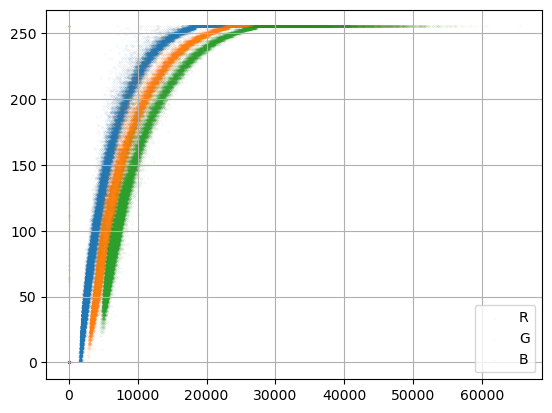

In [4]:
plt.scatter(analytic_band_value[0],visual_band_value[0],s=.001,label="R")
plt.scatter(analytic_band_value[1],visual_band_value[1],s=.001,label="G")
plt.scatter(analytic_band_value[2],visual_band_value[2],s=.001,label="B")
plt.legend()
plt.grid()

In [5]:
# Fit a kNN regression model
from sklearn.neighbors import KNeighborsRegressor
red_model=KNeighborsRegressor(n_neighbors=15)
green_model=KNeighborsRegressor(n_neighbors=15)
blue_model=KNeighborsRegressor(n_neighbors=15)
red_model.fit(np.array(analytic_band_value[0]).reshape(-1,1),visual_band_value[0])
green_model.fit(np.array(analytic_band_value[1]).reshape(-1,1),visual_band_value[1])
blue_model.fit(np.array(analytic_band_value[2]).reshape(-1,1),visual_band_value[2])

KNeighborsRegressor(n_neighbors=15)

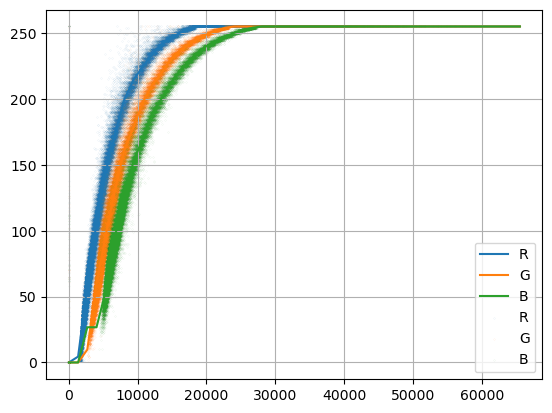

In [6]:
# Plot the fitter line
x=np.linspace(0,65536,50)
plt.plot(x,red_model.predict(x.reshape(-1,1)),label="R")
plt.plot(x,green_model.predict(x.reshape(-1,1)),label="G")
plt.plot(x,blue_model.predict(x.reshape(-1,1)),label="B")
plt.scatter(analytic_band_value[0],visual_band_value[0],s=.001,label="R")
plt.scatter(analytic_band_value[1],visual_band_value[1],s=.001,label="G")
plt.scatter(analytic_band_value[2],visual_band_value[2],s=.001,label="B")
plt.legend()
plt.grid()

In [7]:
import pickle
pickle.dump(red_model,open("../data/band_test/red_model.pkl","wb"))
pickle.dump(green_model,open("../data/band_test/green_model.pkl","wb"))
pickle.dump(blue_model,open("../data/band_test/blue_model.pkl","wb"))